[ 950.36636913 1676.87587357 1230.92267676 1491.80406041 2108.45542124
 1539.06267357 2112.61290503 1748.12840185 2220.41146551  835.37644641
  922.58650473  768.26705257 1557.35617293 1139.69439041 1784.05747982
 1416.10406367 1315.6151467  2880.14241352 1583.78030449 1239.40494893]


(1336.56689754291, 292075.6116579632)


이론 평균: 1349.858808		이론 분산: 294881.216222
평균의 상대 오차: 0.178939	분산의 상대 오차: 0.211874

이론 평균: 1349.858808		이론 분산: 294881.216222
평균의 상대 오차: 0.009847	분산의 상대 오차: 0.009514



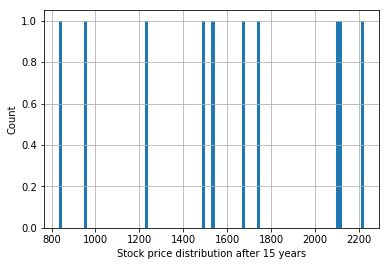

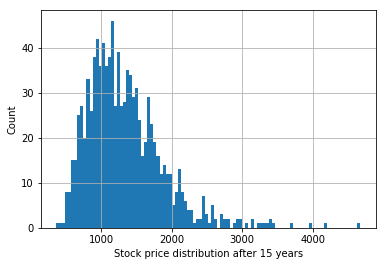

매출액 이익률(PM): 0.31
자산 이익률(ROA): 0.17
자본 이익률(ROE): 0.23
주가 이익 비율(PER): 21.28
주가 매출액 비율(PSR): 6.67
주당 순이익(EPS): 47.00



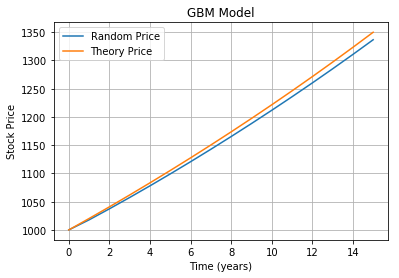

,Expected,Proper,RPD(%)
0,1000.000000,880.000000,12.765957
1,1020.201340,968.000000,5.251112
2,1040.810774,1064.800000,2.278600
3,1061.836547,1171.280000,9.801858
4,1083.287068,1288.408000,17.297412
5,1105.170918,1417.248800,24.744326
6,1127.496852,1558.973680,32.122208
7,1150.273799,1714.871048,39.411428
8,1173.510871,1886.358153,46.593320
9,1197.217363,2074.993968,53.650362


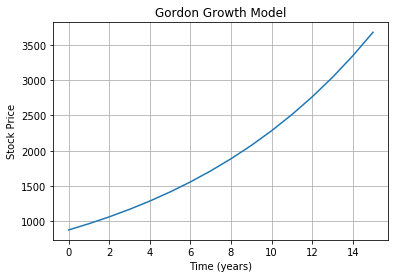

In [31]:
import random #난수 생성과 랜덤 함수를 이용하기 위한 라이브러리
import numpy as np #길이와 차원이 큰 배열을 다루거나 복잡한 수치적 계산을 할 때 필요한 라이브러리
import matplotlib.pyplot as plt #그래프를 그리기 위한 라이브러리
import pandas as pd #데이터 분석과 처리를 위한 라이브러리. 여기서는 표를 생성하기 위한 데이터프레임을 다룰 때 필요하다.


class Stock:
    
    # 모든 멤버변수는 당기 기준의 값이며, 현재 회계연도의 당기말(end of the current period)이자 연말(12월 31일)로 모든 영업활동이 끝난 상황이라고 가정한다.
    def __init__(self, current_stock_price, expected_return, volatility, issued_shares, net_income, sales, assets, equity, dividend, discount_rate, dividend_growth):
    
        self.S0 = current_stock_price #현재 주가
        self.ret = expected_return #기대수익률(1년간)
        self.vol = volatility #변동성(1년간)
        self.iss = issued_shares #발행주식수
        self.NI = net_income #당기순이익
        self.sales = sales #매출
        self.A = assets #자산
        self.E = equity #자본
        self.D = dividend #배당
        self.R = discount_rate #할인율
        self.g = dividend_growth #배당 성장률
    
    
    #geometric Brownian motion model(GBM 모형, 기하 브라운 운동 모형)에 의한 T년 후 예상 주가를 랜덤적으로 샘플링한 표본들의 값을 배열로 리턴하는 함수이다.
    def after_T_years(self, T, seed, size):
        
        np.random.seed(seed) #난수 생성을 위한 시드를 입력변수 seed의 값으로 고정한다.
        z = np.random.normal(0, 1, size) #z는 표준정규분포 N(0,1)에서 랜덤적으로 size개의 표본을 생성했을 때 이들을 원소로 하는 배열이다.
        ST_array = self.S0 * np.exp((self.ret - 0.5 * self.vol**2) * T + self.vol * T**0.5 * z) #ST_array는 배열 z의 각 원소에 따른 ST(T년 후 랜덤 주가)값을 원소로 하는 배열이다.
            
        return ST_array
    
    
    #ST의 원소들의 평균과 분산을 리턴하는 함수이다.
    def sample_mean_and_sample_var(self, T, seed, n):
        
        ST_array = self.after_T_years(T, seed, n) #after_T_years() 함수 정의에서와 동일하게 ST_array을 정의한다.
        sample_mean = ST_array.mean() #sample_mean을 배열 ST_array의 표본평균으로 정의한다. 내장함수인 mean()을 이용했다. numpy 라이브러리의 기본값 ddof=0을 이용해주면 되므로 따로 지정하지 않아도 된다. 표본평균을 구할 때 n으로 나누는 것과 같은 원리이다.
        sample_var = ST_array.var(ddof=1) #sample_var을 배열 ST_array의 표본분산으로 정의한다. 내장함수인 var()을 이용했다. numpy 라이브러리의 경우, 표본분산의 분모의 자유도를 ddof=1으로 지정한다. 표본분산을 구할 때 (n-1)으로 나누는 것과 같은 원리이다.
        
        return sample_mean, sample_var
    
    
    #ST의 이론적 평균과 분산을 구하고, 이를 이용하여 표본평균, 표본분산 각각의 상대오차를 구하는 함수이다.
    def compare_with_theory(self, T, seed, n):
        
        E_ST = self.S0 * np.exp(self.ret * T) #E_ST를 ST의 이론 평균(표본크기가 무한할 때의 평균으로 즉 모평균)으로 정의한다.
        V_ST = self.S0**2 * np.exp(2 * self.ret * T) * (np.exp(self.vol**2 * T)-1) #V_ST를 ST의 이론 분산(표본크기가 무한할 때의 분산으로 즉 모분산)으로 정의한다.
        
        a, b = self.sample_mean_and_sample_var(T, seed, n) #sample_mean_and_sample_var()의 첫 번째 리턴값인 표본평균을 a에 저장하고, 두 번째 리턴값인 표본분산을 b에 저장한다.
        
        mean_err = abs(a - E_ST) / E_ST #이론 평균을 기준으로 표본평균의 상대오차를 계산한다.
        var_err = abs(b - V_ST) / V_ST #이론 분산을 기준으로 표본분산의 상대오차를 계산한다.
        
        print("이론 평균: %0.6f\t\t이론 분산: %0.6f\n평균의 상대 오차: %0.6f\t분산의 상대 오차: %0.6f\n" %(E_ST, V_ST, mean_err, var_err))
        
        
    #ST의 분포를 히스토그램으로 나타내는 함수이다.    
    def show_ST_histogram(self, T, seed, size):
        
        value_array = self.after_T_years(T, seed, size) #after_T_years()을 호출하여 ST 배열을 value_array에 저장한다.
        plt.hist(value_array, bins=100) #value_array의 원소들에 대한 히스토그램을 생성한다. 즉, T년 후 랜덤 주가들에 대한 히스토그램이다. 세밀한 형태를 보기 위해 구간의 개수를 100개로 지정했다.
        plt.xlabel("Stock price distribution after %s years" %(str(T))) #x축 이름 지정. T년 후 주가의 분포를 의미한다.
        plt.ylabel("Count") #y축 이름 지정. 각 구간에 따른 도수를 의미한다.
        plt.grid() #그래프에 그리드를 추가한다.
        plt.savefig("Histogram of Expected Stock Price Samples.jpg", format='jpg') #그래프의 이름을 "Histogram of Expected Stock Price Samples"으로 하여 jpg형태로 저장한다.
        plt.show() #그래프를 보여준다.
    
    
    #현재 상태에서의 여러 투자 지표(PM, ROA, ROE, PER, PSR, EPS)를 출력하는 함수이다.
    def investment_index(self):
        
        PM = self.NI / self.sales #매출액이익률(PM) = 당기순이익/매출액
        ROA = self.NI / self.A #자산이익률(ROA) = 당기순이익/자산총계
        ROE = self.NI / self.E #자본이익률(ROE) = 당기순이익/자본총계
        PER = self.S0 / (self.NI / self.iss) #주가이익비율(PER) = 주가/주당순이익 = 주가/(당기순이익/발행주식수)
        PSR = self.S0 / (self.sales / self.iss) #주가매출액비율(PSR) = 주가/주당매출액 = 주가/(매출액/발행주식수)
        EPS = self.NI / self.iss #주당순이익(EPS) = 당기순이익/발행주식수
        
        print("매출액 이익률(PM): %0.2f\n자산 이익률(ROA): %0.2f\n자본 이익률(ROE): %0.2f\n주가 이익 비율(PER): %0.2f\n주가 매출액 비율(PSR): %0.2f\n주당 순이익(EPS): %0.2f\n" %(PM, ROA, ROE, PER, PSR, EPS))
    
        
    #시간에 따른 랜덤 주가(ST의 표본평균)와 이론 주가(ST의 이론평균)를 그래프로 나타내는 함수이다. 각 중심위치의 척도로 평균을 채택했다.    
    def show_GBM_Model(self, T, seed, size):
        
        time = list(range(T+1)) #x축 변수를 시간으로 한다. 0년(현재)부터 T년 후까지이므로 range(T+1)의 리스트 [0, 1, ... , T]을 만든다.
            
        random_price = [0 for i in range(T+1)] #시간에 따른 ST의 표본평균(즉, T년 후 랜덤 주가)을 원소로 하는 리스트. 길이를 지정하지 않으면 for문이 제대로 작동하지 않으므로 0으로 채워진 길이 (T+1)의 리스트를 만듦으로써 길이를 정해준다.
        theory_price = [0 for i in range(T+1)] #시간에 따른 ST의 이론평균(즉, T년 후 이론 주가)을 원소로 하는 리스트. 마찬가지로 리스트의 길이를 (T+1)으로 정해준다.
        
        for i in range(T+1): #0년부터 T년까지에서의(i가 햇수에 해당, 즉 i년에서의) 각 랜덤 주가와 이론 주가를 계산한다.
            random_price[i] = self.sample_mean_and_sample_var(i, seed, size)[0] #i년 후 랜덤 주가는 sample_mean_and_sample_var()의 첫 번째 리턴값(튜플의 0번 인덱스)이다. 이를 ramdom_price 리스트의 i번째 인덱스에 저장한다.
            theory_price[i] = self.S0 * np.exp(self.ret * i) #compare_with_theory() 함수 정의에서의 E_ST와 동일하게 i년 후 이론 주가를 계산하여 theory_price 리스트의 i번째 인덱스에 저장한다.
            
        plt.plot(time, random_price, label="Random Price") #시간에 따른 랜덤 주가 꺾은 선 그래프(x축: 시간, y축: 랜덤 주가)를 그린다. "Random Price"으로 표시한다.
        plt.plot(time, theory_price, label="Theory Price") #시간에 따른 이론 주가 꺾은 선 그래프(x축: 시간, y축: 이론 주가)를 그린다. "Theory Price"으로 표시한다.
        plt.xlabel("Time (years)") #x축 이름 지정.
        plt.ylabel("Stock Price") #y축 이름 지정.
        plt.title("GBM Model") #그래프 이름 지정.
        plt.legend() #그래프가 두 개이므로 구분을 위해 범례를 표시한다. 위에서 label로 지정한 "Random Price"와 Theory Price".
        plt.grid() #그래프에 그리드를 추가한다.
        plt.savefig("Random and Theoretical Stock Price Graphs by GBM Model.jpg", format='jpg') #그래프의 이름을 "Random and Theoretical Stock Price Graphs by GBM Model"으로 하여 jpg형태로 저장한다.
        plt.show() #그래프를 보여준다.
        
        
    #Gordon growth model(GGM, 배당 성장 모형)에 의한 적정 주가를 시간에 따른 그래프로 보여준다. 위 함수들에 적용된 geometric Brownian motion model와 다르게 배당, 할인율, 배당성장률에 의존하여 적정 주가를 구한다.
    def show_Gordon_Growth_Model(self, T):
        
        time = list(range(T+1)) #show_GBM_Model()에서 Time 리스트를 정의한 것과 동일하다.
        PT = [0 for i in range(T+1)] #시간에 따른 적정주가를 원소로 하는 리스트. 같은 이유로 길이를 (T+1)으로 지정한다.
        
        if self.g < self.R: #Gordon growth model에서 적정 주가가 수렴할 조건은 배당성장률이 할인율보다 작을 때이다.
            P0 = self.D * (1 + self.g) / (self.R - self.g) #배당 성장 모형의 공식에 배당, 할인율, 배당성장률을 대입하여 현재 시점에서의 적정 주가를 계산한다. 
            
            for i in range(T+1): #0년부터 T년까지에서의(i가 햇수에 해당, 즉 i년에서의) 적정 주가를 계산한다.
                PT[i] = P0 * (1 + self.g)**i #할인율 R에 따른 i년 후 주가를 PT 리스트의 i번째 인덱스에 저장한다.
                
            plt.plot(time, PT) #시간에 따른 적정 주가 꺾은 선 그래프(x축: 시간, y축: 적정 주가)를 그린다.
            plt.xlabel("Time (years)") #x축 이름 지정.
            plt.ylabel("Stock Price") #y축 이름 지정.
            plt.title("Gordon Growth Model") #그래프 이름 지정.
            plt.grid() #그래프에 그리드를 추가한다.
            plt.savefig("Stock Price Graphs by Gordon Growth Model.jpg", format='jpg') #그래프의 이름을 "Stock Price Graphs by Gordon Growth Model"으로 하여 jpg형태로 저장한다.
            plt.show #그래프를 보여준다.
        
        else: #배당성장률이 할인율보다 크거나 같은 경우 적정 주가는 발산한다.
            print("할인율(R)이 배당 성장률(g) 이상이므로 주가가 수렴하지 않습니다.\n")
            
            
    #시간에 따른 예상 주가(GBM 모형)가 적정 주가(GGM)에서 얼마나 벗어났는지에 대한 척도인 RPD(relative percent difference, 상대 백분율 차이)의 값을 표로 나타낸다.
    def RPD_of_stock_price(self, T):
        
        S_list = [0 for i in range(T+1)] #시간에 따른 예상 주가(GBM 모형)를 저장하는 리스트를 길이 (T+1)으로 생성한다.
        P_list = [0 for i in range(T+1)] #시간에 따른 적정 주가(GGM)를 저장하는 리스트를 길이 (T+1)으로 생성한다.
        RPD_list = [0 for i in range(T+1)] #시간에 따른 적정 주가에 대한 예상 주가의 RPD값을 저장하는 리스트를 길이 (T+1)으로 생성한다.
        
        for i in range(T+1): #0년부터 T년까지에서의(i가 햇수에 해당, 즉 i년에서의) 예상 주가, 적정 주가, RPD를 계산한다.
            
            S_list[i] = self.S0 * np.exp(self.ret * i) #i년 후의 예상 주가를 S_list의 i번째 인덱스에 저장.
            P_list[i] = self.D * (1 + self.g) / (self.R - self.g) * (1 + self.g)**i #i년 후의 적정 주가를 P_list의 i번째 인덱스에 저장.
            RPD_list[i] = 100 * abs(P_list[i] - S_list[i]) / ((P_list[i] + S_list[i]) / 2) #i년 후의 예상 주가를 RPD_list의 i번째 인덱스에 저장. RPD(%) = 100*(두 값의 차이/두 값의 평균)
        
        df = pd.DataFrame() #데이터를 저장할 데이터프레임(행과 열로 구성한 사각형 모양의 표)을 생성한다.
        df["Expected"] = S_list #1번째 열의 이름을 "Expected"으로 지정하고 S_list의 원소들을 순서대로 저장한다.
        df["Proper"] = P_list #2번째 열의 이름을 "Proper"으로 지정하고 P_list의 원소들을 순서대로 저장한다.
        df["RPD(%)"] = RPD_list #3번째 열의 이름을 "RPD(%)"으로 지정하고 RPD_list의 원소들을 순서대로 저장한다.
        display(df) #표를 보여준다.
        
        
#기업 A를 Stock 클래스의 인스턴스로 하며, A의 멤버변수의 값은 다음과 같이 설정하였다.
#순서대로 현재 주가, 기대수익률, 변동성, 발행주식수, 당기순이익, 매출, 자산, 자본, 배당, 할인율, 배당 성장률
A = Stock(1000, 0.02, 0.1, 10, 470, 1500, 2700, 2000, 40, 0.15, 0.1)

#모든 멤버함수의 시드를 seed=13으로 고정하였고 시간은 T=15으로 하였다.
print(A.after_T_years(15, 13, 20))
print("\n")
print(A.sample_mean_and_sample_var(15, 13, 1000))
print("\n")

#출력 결과에서 사이즈가 커졌을 때 평균 오차와 분산 오차가 감소하는 것을 알 수 있다.
A.compare_with_theory(15, 13, 10)
A.compare_with_theory(15, 13, 1000)

#출력 결과에서 사이즈가 커졌을 때 ST의 분포가 정규분포에 더욱 가깝게 따른다는 '중심 극한 정리(central limit theorem, CLT)'를 확인할 수 있다.
A.show_ST_histogram(15, 13, 10)
A.show_ST_histogram(15, 13, 1000)

A.investment_index()
A.show_GBM_Model(15, 13, 1000)
A.RPD_of_stock_price(10) #출력 결과에서 멤버변수 값을 수정하지 않으면 시간이 지날수록 예상 주가가 적정 주가에서 벗어나는 것을 알 수 있다.
A.show_Gordon_Growth_Model(15)

In [23]:
#이 코드를 실행시키면 가로 여백이 늘어나 보기에 더 편리할 수 있습니다.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))